In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Mac 한글 폰트 설정 (시각화 깨짐 방지)
from matplotlib import rc
rc('font', family='AppleGothic') 
plt.rcParams['axes.unicode_minus'] = False

# 2. 전 단계에서 저장한 CSV 불러오기
# 파일명이 'lgtwins_official_data.csv'가 맞는지 확인해주세요!
df = pd.read_csv("lgtwins_official_data.csv")

# 3. 데이터 타입 전처리 (문자열 -> 숫자)
# 전처리할 주요 컬럼 리스트
cols = ['AVG', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'TB', 'RBI', 'SAC', 'SF']

for col in cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# 결측치는 0으로 채우기
df.fillna(0, inplace=True)

print("✅ 데이터 로드 및 전처리 완료!")
df.head()

✅ 데이터 로드 및 전처리 완료!


,순위,선수명,팀명,AVG,G,PA,AB,R,H,2B,3B,HR,TB,RBI,SAC,SF
0,1,김준태,LG,1.000,2,2,1,1,1,0,0,0,1,0,0,0
1,2,김현종,LG,0.400,10,6,5,3,2,1,0,0,3,0,0,0
2,3,신민재,LG,0.313,135,538,463,87,145,15,7,1,177,61,6,4
3,4,오스틴,LG,0.313,116,499,425,82,133,25,1,31,253,95,0,11
4,5,문성주,LG,0.305,135,542,475,57,145,20,2,3,178,70,0,9


Index(['순위', '선수명', '팀명', 'AVG', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR',
       'TB', 'RBI', 'SAC', 'SF'],
      dtype='object')


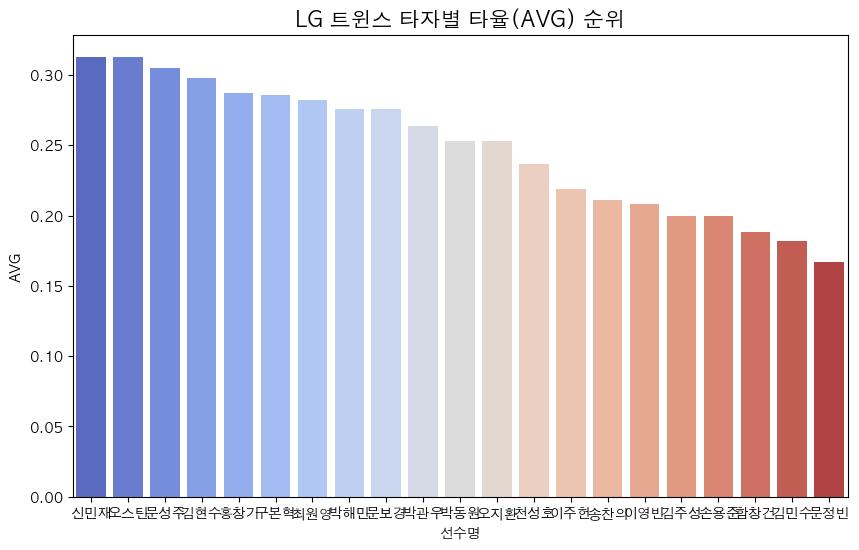

In [4]:
# 1. 먼저 현재 데이터에 어떤 컬럼들이 있는지 확인해보세요 (오류 방지용)
print(df.columns)

# 2. 장타율(SLG) 직접 계산하기 (장타율 = 루타 / 타수)
# 0으로 나누는 에러를 방지하기 위해 타수가 0보다 큰 경우만 계산
df['SLG_calc'] = df['TB'] / df['AB']

# 3. 만약 'OPS'를 꼭 쓰고 싶다면, 우선 타율(AVG)이나 홈런(HR)으로 정렬해보세요.
# 아래 코드로 수정하면 오류 없이 그래프가 그려집니다.
df_main = df[df['PA'] >= 10].copy() # 10타석 이상 선수만
df_sorted = df_main.sort_values(by='AVG', ascending=False) # 타율 기준으로 정렬

# 4. 시각화 코드 실행 (y축을 'AVG'로 변경)
plt.figure(figsize=(10, 6))
sns.barplot(data=df_sorted, x='선수명', y='AVG', palette='coolwarm')
plt.title('LG 트윈스 타자별 타율(AVG) 순위', fontsize=15)
plt.show()

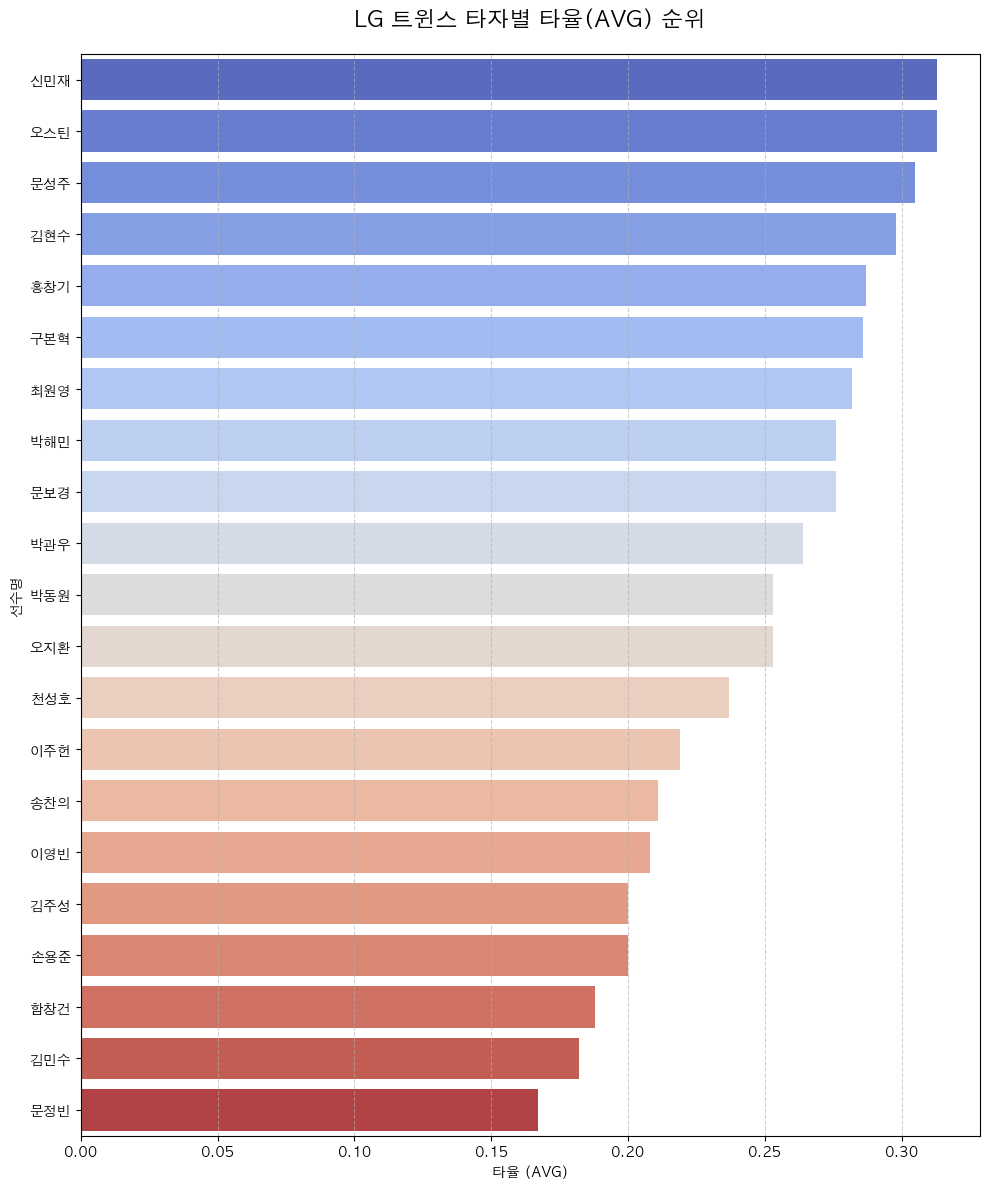

In [5]:
# 그래프 크기를 세로로 길게 조정합니다.
plt.figure(figsize=(10, 12)) 

# x축에 AVG, y축에 선수명을 넣으면 가로형이 됩니다.
sns.barplot(data=df_sorted, x='AVG', y='선수명', palette='coolwarm')

plt.title('LG 트윈스 타자별 타율(AVG) 순위', fontsize=16, pad=20)
plt.xlabel('타율 (AVG)')
plt.ylabel('선수명')
plt.grid(axis='x', linestyle='--', alpha=0.6) # 세로 점선 추가

plt.tight_layout()
plt.show()